In [94]:
# Importing important librarays
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import seaborn as sn
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.pipeline import make_pipeline

In [95]:
#Loading the data
df=  pd.read_csv('world-medium.csv', encoding='latin-1')
df= pd.read_csv('country-medium.csv', encoding='latin-1')
df= pd.read_csv('Regionss-medium.csv', encoding='latin-1')
df= pd.read_csv('SDG-medium.csv',encoding='latin-1')

In [96]:
df.head()
pd.read_csv('world-medium.csv', encoding='latin-1')

,Year,Upper,Median,Lower
0,1990.5,91.7144,93.0265,94.5270
1,1991.5,90.8735,92.0843,93.4727
2,1992.5,90.3102,91.4601,92.7870
3,1993.5,89.1827,90.3089,91.6037
4,1994.5,88.1390,89.2436,90.5175
5,1995.5,86.1959,87.2732,88.5558
6,1996.5,84.4455,85.5041,86.7730
7,1997.5,82.5001,83.5399,84.7788
8,1998.5,80.3815,81.3939,82.6101
9,1999.5,78.0198,79.0101,80.2255


In [97]:
df.head()
pd.read_csv('country-medium.csv', encoding='latin-1')

,ISO.Code,Country.Name,1985.5,1986.5,1987.5,1988.5,1989.5,1990.5,1991.5,1992.5,...,2012.5,2013.5,2014.5,2015.5,2016.5,2017.5,2018.5,2019.5,2020.5,2021.5
0,AFG,Afghanistan,211.0975,204.5622,197.9429,191.3952,184.8613,178.4510,172.2279,166.3461,...,80.2697,76.7712,73.3774,70.1723,67.2483,64.5819,62.1718,59.9173,57.7978,55.6575
1,ALB,Albania,54.7511,51.0898,47.9032,45.1557,42.7981,40.8317,39.1433,37.6286,...,11.2140,10.4634,9.9216,9.5771,9.3997,9.3367,9.3439,9.3881,9.4361,9.4559
2,DZA,Algeria,74.6976,65.2901,59.0642,55.2652,53.0743,51.8901,51.2663,50.7505,...,26.4942,26.0503,25.6681,25.3046,24.9241,24.4831,23.9794,23.4515,22.8973,22.3353
3,AND,Andorra,17.4710,16.4658,15.5682,14.7067,13.8557,13.1167,12.3887,11.7152,...,4.1337,3.9225,3.7267,3.5254,3.3509,3.1954,3.0591,2.9504,2.8483,2.7564
4,AGO,Angola,226.6265,225.4729,224.7202,223.9889,223.7152,223.5046,223.4958,223.5959,...,104.8753,98.3058,92.9119,88.3390,84.4489,81.0795,77.9684,75.0384,72.0743,69.4213
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,VEN,Venezuela (Bolivarian Republic of),36.2501,34.9360,33.6245,32.2637,30.8844,29.6197,28.5913,27.8114,...,17.3363,17.6206,18.0026,19.1425,24.2224,24.2296,24.2297,24.2297,24.2297,24.2297
130,VNM,Viet Nam,61.9697,60.3311,58.4775,56.4042,54.1050,51.6744,49.1336,46.5616,...,22.5605,22.3340,22.1078,21.8924,21.6710,21.4593,21.2525,21.0635,20.8524,20.6016
131,YEM,Yemen,154.5297,147.1474,140.7947,135.3520,130.5996,126.3982,122.7706,119.5892,...,58.8834,58.4959,58.7953,60.7858,60.4594,60.2612,61.6729,61.5950,59.6857,61.9089
132,ZMB,Zambia,167.7380,171.9575,175.7664,178.8577,181.0278,182.2758,182.9471,182.7424,...,74.5472,71.9971,69.5131,68.2222,65.3261,64.1508,64.2227,62.5853,59.6699,57.6918


In [98]:
df.head()
pd.read_csv('Regionss-medium.csv', encoding='latin-1')

,Region.Name,1990.5,1991.5,1992.5,1993.5,1994.5,1995.5,1996.5,1997.5,1998.5,...,2012.5,2013.5,2014.5,2015.5,2016.5,2017.5,2018.5,2019.5,2020.5,2021.5
0,Sub-Saharan Africa,178.8416,177.2996,175.7673,174.4146,174.2914,170.0034,167.1435,164.0101,160.2787,...,94.8158,91.8165,89.1531,86.6944,84.2451,81.9544,79.5613,77.3021,75.1283,73.0150
1,West and Central Africa,196.5265,194.7848,193.1251,191.4276,189.5085,187.1975,184.2728,180.9063,177.0295,...,114.6782,111.9137,109.4210,106.9934,104.5067,102.0296,99.3322,96.7747,94.1115,91.4993
2,Eastern and Southern Africa,162.8551,161.3814,159.8417,158.6544,160.0822,153.6914,150.7554,147.8327,144.2120,...,73.6494,70.2636,67.3551,64.7978,62.3092,60.1618,58.0824,56.1581,54.4784,52.8179
3,Middle East and North Africa,66.0641,63.4843,61.1000,58.7766,56.5419,54.3419,52.0092,49.8130,47.6445,...,27.0598,26.7456,26.0493,25.1304,24.3724,23.2552,22.9710,22.5891,22.0257,21.8948
4,South Asia,130.2313,126.3651,122.6400,119.0594,115.5590,111.9257,108.2909,104.5808,100.8511,...,56.9211,54.2851,51.7388,49.2285,46.8288,44.6347,42.5261,40.5867,38.8007,37.0591
5,East Asia and Pacific,56.5701,55.3941,54.1827,52.6630,50.9393,49.1801,47.3756,45.4948,43.5305,...,19.4074,18.5506,17.6266,16.9835,16.1162,15.3588,15.2243,14.8686,14.8459,14.6939
6,Latin America and Caribbean,54.9055,52.5330,50.1365,47.7747,45.4140,43.1392,40.9458,38.8229,37.3497,...,19.9664,19.3649,18.8262,18.3798,18.5262,17.7764,17.3068,16.8469,16.3759,15.9176
7,North America,10.9485,10.6075,10.2489,9.8908,9.5511,9.2405,8.9711,8.7484,8.5639,...,6.9521,6.8481,6.7558,6.6722,6.5897,6.5034,6.4160,6.3282,6.2338,6.1332
8,Europe and Central Asia,30.9468,30.3919,29.9541,29.5330,28.9147,28.1032,26.9159,25.5807,24.2389,...,10.7999,10.4155,9.9799,9.5410,9.0795,8.6928,8.4128,8.1595,7.8994,7.6020
9,Eastern Europe and Central Asia,46.7874,46.6131,46.7367,46.6986,46.0030,45.0676,43.6428,41.9332,40.0027,...,16.0460,15.2584,14.4733,13.7038,12.9826,12.4537,12.0170,11.6575,11.2392,10.8223


In [99]:
df.head()
pd.read_csv('SDG-medium.csv', encoding='latin-1')

,Region.Name,1990.5,1991.5,1992.5,1993.5,1994.5,1995.5,1996.5,1997.5,1998.5,...,2012.5,2013.5,2014.5,2015.5,2016.5,2017.5,2018.5,2019.5,2020.5,2021.5
0,Landlocked developing countries,167.0614,164.8220,162.7679,161.2435,162.3344,155.0526,151.7127,148.6099,144.9839,...,76.0458,72.7483,69.8582,67.3011,64.8649,62.8573,60.8472,58.9498,57.2073,55.7039
1,Small island developing States,76.8461,75.1958,73.6773,72.0216,70.4050,68.5043,67.1235,65.0596,63.5115,...,46.0231,45.1305,44.1586,43.1290,42.5455,41.7740,40.7229,39.8651,38.8759,37.8665
2,Europe and Northern America,14.1996,13.6623,13.2123,12.7414,12.3014,11.8129,11.3487,10.9102,10.4996,...,6.5924,6.4379,6.2573,6.0631,5.8567,5.6546,5.4789,5.3214,5.1778,5.0517
3,Northern America,10.9485,10.6075,10.2489,9.8908,9.5511,9.2405,8.9711,8.7484,8.5639,...,6.9521,6.8481,6.7558,6.6722,6.5897,6.5034,6.4160,6.3282,6.2338,6.1332
4,Europe,15.7897,15.2020,14.7499,14.2663,13.8021,13.2428,12.6826,12.1337,11.6200,...,6.4008,6.2159,5.9863,5.7306,5.4577,5.1819,4.9491,4.7384,4.5627,4.4085
5,Latin America and the Caribbean,54.9055,52.5330,50.1365,47.7747,45.4140,43.1392,40.9458,38.8229,37.3497,...,19.9664,19.3649,18.8262,18.3798,18.5262,17.7764,17.3068,16.8469,16.3759,15.9176
6,Central and Southern Asia,124.7905,121.1730,117.8126,114.6698,111.6988,108.5214,105.2326,101.8036,98.2595,...,54.3468,51.7274,49.1776,46.7512,44.4783,42.3981,40.4317,38.6661,36.9883,35.3868
7,Central Asia,70.4632,70.8332,71.7529,72.6310,72.9918,72.6020,71.4278,69.5935,67.1543,...,26.4919,25.0651,23.7483,22.6675,21.7057,20.9083,20.0744,19.3844,18.6261,18.1368
8,Southern Asia,126.9487,123.1648,119.6071,116.2718,113.1350,109.8210,106.4132,102.8765,99.2508,...,55.4706,52.8354,50.2854,47.8281,45.5018,43.3683,41.3819,39.5973,37.9074,36.2392
9,Eastern and South-Eastern Asia,56.8562,55.7051,54.5111,52.9863,51.2471,49.4702,47.6460,45.7415,43.7493,...,19.3003,18.4331,17.4969,16.8483,15.9752,15.2140,15.0765,14.7139,14.6857,14.5341


C:\Users\Administrator\AppData\Local\Temp\ipykernel_10416\1169545517.py:3: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




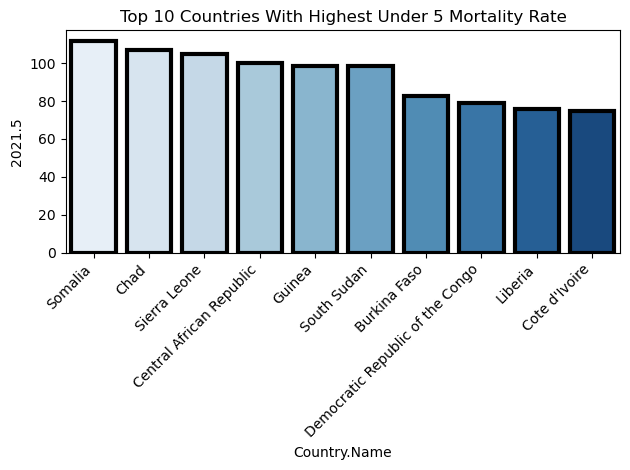

In [100]:
df= pd.read_csv('country-medium.csv', encoding='latin-1')
q = df.nlargest(10, '2021.5') 
sns.barplot(x='Country.Name', y='2021.5', data=q, ci=None, palette='Blues', edgecolor='black', lw=3)
plt.title('Top 10 Countries With Highest Under 5 Mortality Rate')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
# Show the plot
plt.show()


C:\Users\Administrator\AppData\Local\Temp\ipykernel_10416\203099964.py:4: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




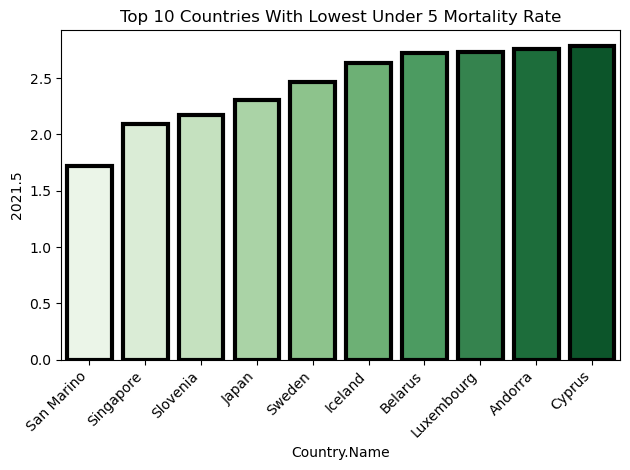

In [101]:
df= pd.read_csv('country-medium.csv', encoding='latin-1')
q_lowest = df.nsmallest(10, '2021.5')
# Create a bar plot for the 10 countries with the lowest child mortality rates
sns.barplot(x='Country.Name', y='2021.5', data=q_lowest, ci=None, palette='Greens', edgecolor='black', lw=3)
plt.title('Top 10 Countries With Lowest Under 5 Mortality Rate')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



In [102]:
df= pd.read_csv('country-medium.csv', encoding='latin-1')
w = df.groupby(["Country.Name"])["2021.5"].mean()
mortality = w.nlargest(20).index
# Filter the DataFrame to include only the selected countries
filtered_data =  df[df["Country.Name"].isin(mortality)]
data = dict(
    type='choropleth',
    locations=filtered_data["Country.Name"],
    locationmode='country names',
    colorscale='Viridis',
    text=filtered_data["Country.Name"],
    z=filtered_data["2021.5"],
    colorbar={'title': '2021.5 Under 5 Mortality Rate', 'len': 350, 'lenmode': 'pixels'}
)

layout = dict(
    geo={'scope': 'world'},
    title="Top 10 Countries With the heghest Under 5 Mortality Rates (2021.5)"
)

choropleth_map = go.Figure(data=[data], layout=layout)
choropleth_map.show()


In [103]:
df= pd.read_csv('country-medium.csv', encoding='latin-1')
w = df.groupby(["Country.Name"])["2021.5"].mean()

data = dict(
    type='choropleth',
    locations=w.index,
    locationmode='country names',
    colorscale='Viridis',  
    text=w.index,
    z=w,
    colorbar={'title': '2021 Under 5 Mortality Rate', 'len': 350, 'lenmode': 'pixels'}
)

layout = dict(
    geo={'scope': 'world'},
    title="Under 5 Mortality Rate of 2021.5 (Death Per 1000 Births)"
)

choropleth_map = go.Figure(data=[data], layout=layout)
choropleth_map.show()


In [104]:
df= pd.read_csv('country-medium.csv', encoding='latin-1')
years = df.columns[5:-1]
years = [str(year) for year in years]

# Create animated bar chart
fig_bar = px.bar(df, x='2021.5', y='Country.Name', orientation='h',
                 animation_frame='2021.5',  
                 color='2021.5',
                 title='Under-five Mortality Rates Over the Years',
                 labels={'2021.5': 'Mortality Rate (Deaths per 1000 live births)'})


# Update layout for animation controls
fig_bar.update_layout(updatemenus=[{
    'type': 'buttons',
    'showactive': False,
    'buttons': [
        {'label': 'Play',
         'method': 'animate',
         'args': [None, {'frame': {'duration': 500, 'redraw': True}, 'fromcurrent': True}]},
        {'label': 'Pause',
         'method': 'animate',
         'args': [[None], {'frame': {'duration': 0, 'redraw': True}, 'mode': 'immediate', 'transition': {'duration': 0}}],
        }],
}])

# Add slider for selecting the year
fig_bar.update_layout(sliders=[{
    'active': 0,
    'yanchor': 'top',
    'xanchor': 'left',
    'currentvalue': {
        'font': {'size': 20},
        'prefix': 'Year:',
        'visible': True,
        'xanchor': 'right',
    },
    'transition': {'duration': 300, 'easing': 'cubic-in-out'},
    'pad': {'b': 10, 't': 50},
    'steps': [{
        'args': [
            [year],
            {
                'frame': {'duration': 300, 'redraw': True},
                'mode': 'immediate',
                'transition': {'duration': 300},
            },
        ],
        'label': str(year),
        'method': 'animate',
    } for year in years],
}])

# Show the plot
fig_bar.show()


In [105]:
df= pd.read_csv('Regionss-medium.csv', encoding='latin-1')
years = df.columns[5:-1]
years = [str(year) for year in years]

# Create animated bar chart
fig_bar = px.bar(df, x='2021.5', y='Region.Name', orientation='h',
                 animation_frame='2021.5', 
                 color='2021.5',
                 title='Under-five Mortality Rates Over the Years',
                 labels={'2021.5': 'Mortality Rate (Deaths per 1000 live births)'})


# Update layout for animation controls
fig_bar.update_layout(updatemenus=[{
    'type': 'buttons',
    'showactive': False,
    'buttons': [
        {'label': 'Play',
         'method': 'animate',
         'args': [None, {'frame': {'duration': 500, 'redraw': True}, 'fromcurrent': True}]},
        {'label': 'Pause',
         'method': 'animate',
         'args': [[None], {'frame': {'duration': 0, 'redraw': True}, 'mode': 'immediate', 'transition': {'duration': 0}}],
        }],
}])

# Add slider for selecting the year
fig_bar.update_layout(sliders=[{
    'active': 0,
    'yanchor': 'top',
    'xanchor': 'left',
    'currentvalue': {
        'font': {'size': 20},
        'prefix': 'Year:',
        'visible': True,
        'xanchor': 'right',
    },
    'transition': {'duration': 300, 'easing': 'cubic-in-out'},
    'pad': {'b': 10, 't': 50},
    'steps': [{
        'args': [
            [year],
            {
                'frame': {'duration': 300, 'redraw': True},
                'mode': 'immediate',
                'transition': {'duration': 300},
            },
        ],
        'label': str(year),
        'method': 'animate',
    } for year in years],
}])

# Show the plot
fig_bar.show()


In [106]:
df= pd.read_csv('SDG-medium.csv',encoding='latin-1')
years = df.columns[31:-1]
years = [str(year) for year in years]

# Create animated bar chart
fig_bar = px.bar(df, x='2021.5', y='Region.Name', orientation='h',
                 animation_frame='2021.5', 
                 color='2021.5',
                 title='Under-five Mortality Rates Over the Years',
                 labels={'2021.5': 'Mortality Rate (Deaths per 1000 live births)'})


# Update layout for animation controls
fig_bar.update_layout(updatemenus=[{
    'type': 'buttons',
    'showactive': False,
    'buttons': [
        {'label': 'Play',
         'method': 'animate',
         'args': [None, {'frame': {'duration': 500, 'redraw': True}, 'fromcurrent': True}]},
        {'label': 'Pause',
         'method': 'animate',
         'args': [[None], {'frame': {'duration': 0, 'redraw': True}, 'mode': 'immediate', 'transition': {'duration': 0}}],
        }],
}])

# Add slider for selecting the year
fig_bar.update_layout(sliders=[{
    'active': 0,
    'yanchor': 'top',
    'xanchor': 'left',
    'currentvalue': {
        'font': {'size': 20},
        'prefix': 'Year:',
        'visible': True,
        'xanchor': 'right',
    },
    'transition': {'duration': 300, 'easing': 'cubic-in-out'},
    'pad': {'b': 10, 't': 50},
    'steps': [{
        'args': [
            [year],
            {
                'frame': {'duration': 300, 'redraw': True},
                'mode': 'immediate',
                'transition': {'duration': 300},
            },
        ],
        'label': str(year),
        'method': 'animate',
    } for year in years],
}])

# Show the plot
fig_bar.show()


In [107]:
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

file_path = 'world-medium.csv'
df = pd.read_csv(file_path, encoding='latin1')  # You can try 'utf-8', 'latin1', or 'ISO-8859-1'

# Select features (X) and target variable (y)
X = df[['Year']]  # Use columns 'Year' as features
y = df['Median']  # Use 'Median' as the target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a dictionary of models
lr_models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42)
}

# Train and evaluate each model
for name, model in lr_models.items(): 
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'{name} - Mean Squared Error: {mse}, R-squared: {r2}')


Linear Regression - Mean Squared Error: 10.71800075637162, R-squared: 0.9609110320886523
Decision Tree - Mean Squared Error: 208.14317042714285, R-squared: 0.2408937175194703
Random Forest - Mean Squared Error: 84.65000860036479, R-squared: 0.6912781081949534


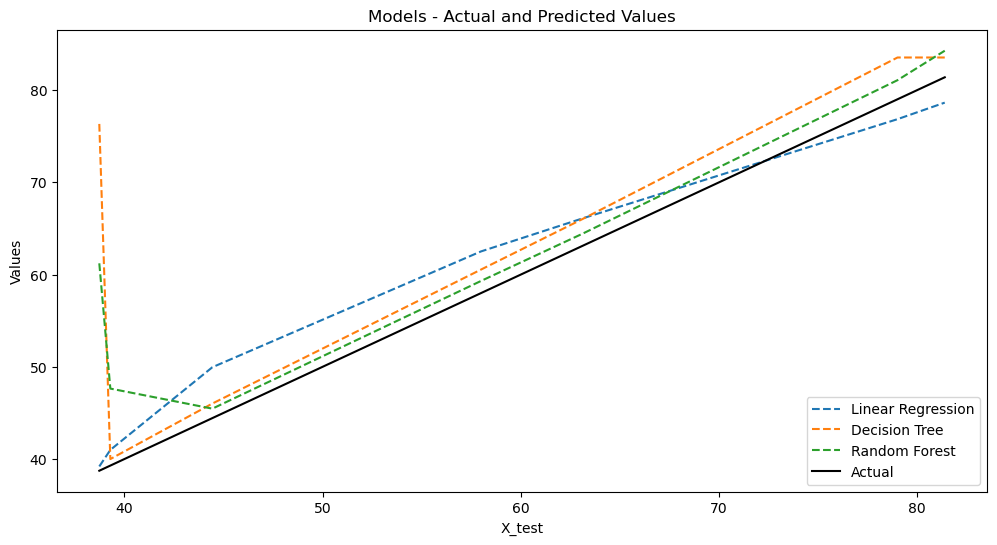

In [108]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting for all three models
plt.figure(figsize=(12, 6))

# Linear Regression
sns.lineplot(x=y_test, y=lr_models['Linear Regression'].predict(X_test), label='Linear Regression', linestyle='dashed')
# Decision Tree
sns.lineplot(x=y_test, y=lr_models['Decision Tree'].predict(X_test), label='Decision Tree', linestyle='dashed')
# Random Forest
sns.lineplot(x=y_test, y=lr_models['Random Forest'].predict(X_test), label='Random Forest', linestyle='dashed')

# Plot actual values
sns.lineplot(x=y_test, y=y_test, label='Actual', color='black')

plt.title('Models - Actual and Predicted Values')
plt.xlabel('X_test')
plt.ylabel('Values')
plt.legend()
plt.show()


In [109]:
# Read the data from the CSV file with explicit encoding specification
file_path = 'world-medium.csv'
df = pd.read_csv(file_path, encoding='latin1')  # You can try 'utf-8', 'latin1', or 'ISO-8859-1'

# Select features (X) and target variable (y)
# Select features (X) and target variable (y)
X = df[['Year']]  # Use columns '1985.5', '1986.5', '1987.5' as features
y = df['Median']  # Use '2021.5' as the target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model: Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Predict mortality rates for 2021.5 for all countries
mortality_predictions = lr_model.predict(df[['Year']])

# Add the predicted mortality rates to the DataFrame
df['Predicted_Mortality_Year'] = mortality_predictions

# Display the DataFrame with predicted values
print(df[['Year', 'Predicted_Mortality_Year']])


Mean Squared Error: 10.71800075637162
R-squared: 0.9609110320886523
      Year  Predicted_Mortality_Year
0   1990.5                 92.991317
1   1991.5                 91.198235
2   1992.5                 89.405153
3   1993.5                 87.612070
4   1994.5                 85.818988
5   1995.5                 84.025906
6   1996.5                 82.232824
7   1997.5                 80.439742
8   1998.5                 78.646660
9   1999.5                 76.853578
10  2020.5                 39.198854
11  2001.5                 73.267414
12  2002.5                 71.474332
13  2003.5                 69.681250
14  2004.5                 67.888168
15  2005.5                 66.095086
16  2006.5                 64.302003
17  2007.5                 62.508921
18  2008.5                 60.715839
19  2009.5                 58.922757
20  2010.5                 57.129675
21  2011.5                 55.336593
22  2012.5                 53.543511
23  2013.5                 51.750429
24  201

In [110]:
# Read the data from the CSV file with explicit encoding specification
file_path = 'country-medium.csv'
df = pd.read_csv(file_path, encoding='latin1')  # You can try 'utf-8', 'latin1', or 'ISO-8859-1'

# Select features (X) and target variable (y)
X = df[['1985.5', '1986.5', '1987.5', '1988.5', '1989.5', '1990.5', '1991.5', '1992.5', '1993.5', '1994.5', '1995.5', '1996.5', '1997.5', '1998.5', '1999.5', '2000.5', '2001.5', '2002.5', '2003.5', '2004.5', '2005.5', '2006.5', '2007.5', '2008.5', '2009.5', '2010.5', '2011.5', '2012.5', '2013.5', '2014.5', '2015.5', '2016.5', '2017.5', '2018.5', '2019.5', '2020.5']]  
y = df['2021.5']  

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model: Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Predict mortality rates for 2021.5 and 2025.5 for all countries
mortality_predictions_2021_5 = lr_model.predict(df[['1985.5', '1986.5', '1987.5', '1988.5', '1989.5', '1990.5', '1991.5', '1992.5', '1993.5', '1994.5', '1995.5', '1996.5', '1997.5', '1998.5', '1999.5', '2000.5', '2001.5', '2002.5', '2003.5', '2004.5', '2005.5', '2006.5', '2007.5', '2008.5', '2009.5', '2010.5', '2011.5', '2012.5', '2013.5', '2014.5', '2015.5', '2016.5', '2017.5', '2018.5', '2019.5', '2020.5']])
df['Predicted_Mortality_2021.5'] = mortality_predictions_2021_5

mortality_predictions_2025_5 = lr_model.predict(df[['1985.5', '1986.5', '1987.5', '1988.5', '1989.5', '1990.5', '1991.5', '1992.5', '1993.5', '1994.5', '1995.5', '1996.5', '1997.5', '1998.5', '1999.5', '2000.5', '2001.5', '2002.5', '2003.5', '2004.5', '2005.5', '2006.5', '2007.5', '2008.5', '2009.5', '2010.5', '2011.5', '2012.5', '2013.5', '2014.5', '2015.5', '2016.5', '2017.5', '2018.5', '2019.5', '2020.5']])
df['Predicted_Mortality_2025.5'] = mortality_predictions_2025_5

# Ensure gradual decline in predictions
predictions = {}
years_to_predict = ['2021.5', '2022.5', '2023.5', '2024.5', '2025.5']
for year in years_to_predict:
    mortality_predictions = lr_model.predict(df[['1985.5', '1986.5', '1987.5', '1988.5', '1989.5', '1990.5', '1991.5', '1992.5', '1993.5', '1994.5', '1995.5', '1996.5', '1997.5', '1998.5', '1999.5', '2000.5', '2001.5', '2002.5', '2003.5', '2004.5', '2005.5', '2006.5', '2007.5', '2008.5', '2009.5', '2010.5', '2011.5', '2012.5', '2013.5', '2014.5', '2015.5', '2016.5', '2017.5', '2018.5', '2019.5', '2020.5']])
    df[f'Predicted_Mortality_{year}'] = mortality_predictions
    predictions[year] = mortality_predictions

# Assign predicted mortality rates for each year to new DataFrame columns
for year, mortality_predictions in predictions.items():
    year_float = float(year)
    decay_factor = 0.95 ** (year_float - 2021)  # Adjust the decay factor as per your preference
    adjusted_predictions = mortality_predictions * decay_factor
    df[f'Predicted_Mortality_{year}'] = adjusted_predictions


# Display the DataFrame with predicted values for each country and each year
for year in years_to_predict:
    for index, row in df.iterrows():
        print(f"Country: {row['Country.Name']}, Year: {year}, Predicted Mortality: {row[f'Predicted_Mortality_{year}']}")


Mean Squared Error: 58.663182166091666
R-squared: 0.9368254986831583
Country: Afghanistan, Year: 2021.5, Predicted Mortality: 54.419288527259184
Country: Albania, Year: 2021.5, Predicted Mortality: 9.175520140427457
Country: Algeria, Year: 2021.5, Predicted Mortality: 21.836970515153645
Country: Andorra, Year: 2021.5, Predicted Mortality: 2.6871684134250997
Country: Angola, Year: 2021.5, Predicted Mortality: 68.61193921859676
Country: Anguilla, Year: 2021.5, Predicted Mortality: 3.896692918376046
Country: Antigua and Barbuda, Year: 2021.5, Predicted Mortality: 6.034157756259987
Country: Argentina, Year: 2021.5, Predicted Mortality: 6.886951196146953
Country: Armenia, Year: 2021.5, Predicted Mortality: 10.449396410498613
Country: Australia, Year: 2021.5, Predicted Mortality: 3.6345611993799065
Country: Austria, Year: 2021.5, Predicted Mortality: 3.5118232250050014
Country: Azerbaijan, Year: 2021.5, Predicted Mortality: 17.95601764758974
Country: Bahamas, Year: 2021.5, Predicted Mortalit

In [111]:
# Read the data from the CSV file with explicit encoding specification
file_path = 'Regionss-medium.csv'
df = pd.read_csv(file_path, encoding='latin1')  # You can try 'utf-8', 'latin1', or 'ISO-8859-1'

# Select features (X) and target variable (y)
X = df[['1990.5', '1991.5', '1992.5', '1993.5', '1994.5', '1995.5', '1996.5', '1997.5', '1998.5', '1999.5', '2000.5', '2001.5', '2002.5', '2003.5', '2004.5', '2005.5', '2006.5', '2007.5', '2008.5', '2009.5', '2010.5', '2011.5', '2012.5', '2013.5', '2014.5', '2015.5', '2016.5', '2017.5', '2018.5', '2019.5', '2020.5']]  
y = df['2021.5']  

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model: Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Predict mortality rates for 2021.5 and 2025.5 for all countries
mortality_predictions_2021_5 = lr_model.predict(df[['1990.5', '1991.5', '1992.5', '1993.5', '1994.5', '1995.5', '1996.5', '1997.5', '1998.5', '1999.5', '2000.5', '2001.5', '2002.5', '2003.5', '2004.5', '2005.5', '2006.5', '2007.5', '2008.5', '2009.5', '2010.5', '2011.5', '2012.5', '2013.5', '2014.5', '2015.5', '2016.5', '2017.5', '2018.5', '2019.5', '2020.5']])
df['Predicted_Mortality_2021.5'] = mortality_predictions_2021_5

mortality_predictions_2025_5 = lr_model.predict(df[['1990.5', '1991.5', '1992.5', '1993.5', '1994.5', '1995.5', '1996.5', '1997.5', '1998.5', '1999.5', '2000.5', '2001.5', '2002.5', '2003.5', '2004.5', '2005.5', '2006.5', '2007.5', '2008.5', '2009.5', '2010.5', '2011.5', '2012.5', '2013.5', '2014.5', '2015.5', '2016.5', '2017.5', '2018.5', '2019.5', '2020.5']])
df['Predicted_Mortality_2025.5'] = mortality_predictions_2025_5

# Ensure gradual decline in predictions
predictions = {}
years_to_predict = ['2021.5', '2022.5', '2023.5', '2024.5', '2025.5']
for year in years_to_predict:
    mortality_predictions = lr_model.predict(df[['1990.5', '1991.5', '1992.5', '1993.5', '1994.5', '1995.5', '1996.5', '1997.5', '1998.5', '1999.5', '2000.5', '2001.5', '2002.5', '2003.5', '2004.5', '2005.5', '2006.5', '2007.5', '2008.5', '2009.5', '2010.5', '2011.5', '2012.5', '2013.5', '2014.5', '2015.5', '2016.5', '2017.5', '2018.5', '2019.5', '2020.5']])
    df[f'Predicted_Mortality_{year}'] = mortality_predictions
    predictions[year] = mortality_predictions

# Assign predicted mortality rates for each year to new DataFrame columns
for year, mortality_predictions in predictions.items():
    year_float = float(year)
    decay_factor = 0.95 ** (year_float - 2021)  # Adjust the decay factor as per your preference
    adjusted_predictions = mortality_predictions * decay_factor
    df[f'Predicted_Mortality_{year}'] = adjusted_predictions


# Display the DataFrame with predicted values for each country and each year
for year in years_to_predict:
    for index, row in df.iterrows():
        print(f"Country: {row['Region.Name']}, Year: {year}, Predicted Mortality: {row[f'Predicted_Mortality_{year}']}")


Mean Squared Error: 0.39939119849591703
R-squared: 0.9995065367104025
Country: Sub-Saharan Africa, Year: 2021.5, Predicted Mortality: 71.20966892493281
Country: West and Central Africa, Year: 2021.5, Predicted Mortality: 89.18248597939811
Country: Eastern and Southern Africa, Year: 2021.5, Predicted Mortality: 51.48052090246864
Country: Middle East and North Africa, Year: 2021.5, Predicted Mortality: 21.340411282072292
Country: South Asia, Year: 2021.5, Predicted Mortality: 36.12074263037106
Country: East Asia and Pacific, Year: 2021.5, Predicted Mortality: 13.263911939230843
Country: Latin America and Caribbean, Year: 2021.5, Predicted Mortality: 15.514557366293062
Country: North America, Year: 2021.5, Predicted Mortality: 5.977903907558149
Country: Europe and Central Asia, Year: 2021.5, Predicted Mortality: 7.409513060923685
Country: Eastern Europe and Central Asia, Year: 2021.5, Predicted Mortality: 10.417274399550324
Country: Western Europe, Year: 2021.5, Predicted Mortality: 3.589

In [112]:
# Read the data from the CSV file with explicit encoding specification
file_path = 'SDG-Medium.csv'
df = pd.read_csv(file_path, encoding='latin1')  # You can try 'utf-8', 'latin1', or 'ISO-8859-1'

# Select features (X) and target variable (y)
X = df[['1990.5', '1991.5', '1992.5', '1993.5', '1994.5', '1995.5', '1996.5', '1997.5', '1998.5', '1999.5', '2000.5', '2001.5', '2002.5', '2003.5', '2004.5', '2005.5', '2006.5', '2007.5', '2008.5', '2009.5', '2010.5', '2011.5', '2012.5', '2013.5', '2014.5', '2015.5', '2016.5', '2017.5', '2018.5', '2019.5', '2020.5']]  
y = df['2021.5']  

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model: Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Predict mortality rates for 2021.5 and 2025.5 for all countries
mortality_predictions_2021_5 = lr_model.predict(df[['1990.5', '1991.5', '1992.5', '1993.5', '1994.5', '1995.5', '1996.5', '1997.5', '1998.5', '1999.5', '2000.5', '2001.5', '2002.5', '2003.5', '2004.5', '2005.5', '2006.5', '2007.5', '2008.5', '2009.5', '2010.5', '2011.5', '2012.5', '2013.5', '2014.5', '2015.5', '2016.5', '2017.5', '2018.5', '2019.5', '2020.5']])
df['Predicted_Mortality_2021.5'] = mortality_predictions_2021_5

mortality_predictions_2025_5 = lr_model.predict(df[['1990.5', '1991.5', '1992.5', '1993.5', '1994.5', '1995.5', '1996.5', '1997.5', '1998.5', '1999.5', '2000.5', '2001.5', '2002.5', '2003.5', '2004.5', '2005.5', '2006.5', '2007.5', '2008.5', '2009.5', '2010.5', '2011.5', '2012.5', '2013.5', '2014.5', '2015.5', '2016.5', '2017.5', '2018.5', '2019.5', '2020.5']])
df['Predicted_Mortality_2025.5'] = mortality_predictions_2025_5

# Ensure gradual decline in predictions
predictions = {}
years_to_predict = ['2021.5', '2022.5', '2023.5', '2024.5', '2025.5']
for year in years_to_predict:
    mortality_predictions = lr_model.predict(df[['1990.5', '1991.5', '1992.5', '1993.5', '1994.5', '1995.5', '1996.5', '1997.5', '1998.5', '1999.5', '2000.5', '2001.5', '2002.5', '2003.5', '2004.5', '2005.5', '2006.5', '2007.5', '2008.5', '2009.5', '2010.5', '2011.5', '2012.5', '2013.5', '2014.5', '2015.5', '2016.5', '2017.5', '2018.5', '2019.5', '2020.5']])
    df[f'Predicted_Mortality_{year}'] = mortality_predictions
    predictions[year] = mortality_predictions

# Assign predicted mortality rates for each year to new DataFrame columns
for year, mortality_predictions in predictions.items():
    year_float = float(year)
    decay_factor = 0.95 ** (year_float - 2021)  # Adjust the decay factor as per your preference
    adjusted_predictions = mortality_predictions * decay_factor
    df[f'Predicted_Mortality_{year}'] = adjusted_predictions


# Display the DataFrame with predicted values for each country and each year
for year in years_to_predict:
    for index, row in df.iterrows():
        print(f"Country: {row['Region.Name']}, Year: {year}, Predicted Mortality: {row[f'Predicted_Mortality_{year}']}")


Mean Squared Error: 0.0031051207933855927
R-squared: 0.9999930712386739
Country: Landlocked developing countries, Year: 2021.5, Predicted Mortality: 54.29344575038039
Country: Small island developing States, Year: 2021.5, Predicted Mortality: 36.90769880577086
Country: Europe and Northern America, Year: 2021.5, Predicted Mortality: 4.923788099167137
Country: Northern America, Year: 2021.5, Predicted Mortality: 5.97790390755822
Country: Europe, Year: 2021.5, Predicted Mortality: 4.296874286909051
Country: Latin America and the Caribbean, Year: 2021.5, Predicted Mortality: 15.514557366293147
Country: Central and Southern Asia, Year: 2021.5, Predicted Mortality: 34.4907862120886
Country: Central Asia, Year: 2021.5, Predicted Mortality: 17.67756596729314
Country: Southern Asia, Year: 2021.5, Predicted Mortality: 35.35123021446178
Country: Eastern and South-Eastern Asia, Year: 2021.5, Predicted Mortality: 14.158418001044167
Country: Eastern Asia, Year: 2021.5, Predicted Mortality: 6.6433175

In [113]:
#dumping a data
from joblib import dump
dump(lr_model,"modeling Tomorrow.joblib")

['modeling Tomorrow.joblib']

In [73]:
import pickle
pickle.dump(lr_model,open('lr_model.pkl','wb'))